In [49]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


In [50]:
class BMIstate(TypedDict,total=False):
    weight_kg:float
    height_m:float
    bmi:float
    category:str

In [51]:
def calculate_bmi(state: BMIstate) -> BMIstate:
    
    weight= state['weight_kg']
    height= state['height_m']
    bmi= weight/(height**2)

    state['bmi']= round(bmi,2)
    return state

In [56]:
def bmi_label(state: BMIstate)-> BMIstate:

    bmi= state['bmi']

    if bmi < 18.5 :
        state['category']= "underweight"
    elif 18.5 <= bmi <25:
        state['category']= "Normal"
    elif 25<= bmi < 30:
        state['category']= "overweight"
    else :
        state['category']= "Obese"
        
    return state

In [58]:
#define graph
graph= StateGraph(BMIstate)

#add nodes
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('bmi_label', bmi_label)
#add edges

graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','bmi_label')
graph.add_edge('bmi_label',END)

#complie

workflow= graph.compile()



In [61]:
initial_state= {'weight_kg':80, 'height_m':1.75}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.75, 'bmi': 26.12, 'category': 'overweight'}


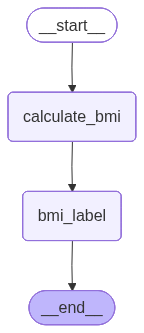

In [55]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [32]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class BMIstate(TypedDict, total=False):
    weight_kg: float
    height_m: float
    bmi: float


def calculate_bmi(state: BMIstate) -> BMIstate:
    weight = state["weight_kg"]
    height = state["height_m"]
    bmi = weight / (height ** 2)

    state["bmi"] = round(bmi, 2)
    return state


graph = StateGraph(BMIstate)

graph.add_node("calculate_bmi", calculate_bmi)
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", END)

workflow = graph.compile()

initial_state = {
    "weight_kg": 60,
    "height_m": 1.75
}

final_state = workflow.invoke(initial_state)
print(final_state)


{'weight_kg': 60, 'height_m': 1.75, 'bmi': 19.59}
